In [1]:
import numpy as np
#from sklearn.metrics import jaccard_similarity_score

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/comoda_data.csv")

In [5]:
df = df.replace(-1.0, np.nan)
df = df.dropna(how="any")

In [6]:
## CONSTANTS ASSUMPTION
sigma = 1
threshold = 0.1
columns = df.columns.tolist()
columns.remove("rating")
columns.append("rating")
df = df[columns]
X = df[columns[2:-1]]
y = df[columns[-1:]]
df = df.reset_index(drop=True)

## Clean Data

In [7]:
columns = df.columns

In [8]:
columns = columns[2:-1]

In [9]:
df_new = df.drop(['city','physical','director','movieCountry','movieLanguage','movieYear','genre1', 'genre2',
       'genre3', 'actor1', 'actor2', 'actor3','budget'], axis=1,)

In [10]:
from collections import defaultdict
new_size_of_feature = defaultdict(dict)
for column in df_new.columns:
    new_size_of_feature[column]['length'] = len(df_new[column].unique())
    new_size_of_feature[column]['names'] = df_new[column].unique()

In [11]:
sum_of_features = 0
for k,v in new_size_of_feature.items():
    sum_of_features += v['length']

In [12]:
sum_of_features

752

In [13]:
## Get Dummy Variables
for column in df_new.columns[2:-1]:
    df_col = pd.get_dummies(df_new[column], prefix=column)
    df_new = pd.concat([df_new, df_col], axis=1)

In [14]:
df_new = df_new.drop(['age', 'sex', 'country', 'time', 'daytype',
       'season', 'location', 'weather', 'social', 'endEmo', 'dominantEmo',
       'mood', 'decision', 'interaction'], axis=1)

In [15]:
df_new.shape

(1114, 77)

In [16]:
columns = df_new.columns.tolist()
columns.remove("rating")
columns.append("rating")
df_new = df_new[columns]

In [17]:
entriesToRemove = ('userID','itemID','city','physical','director','movieCountry','movieLanguage','movieYear','genre1', 'genre2',
       'genre3', 'actor1', 'actor2', 'actor3','budget','rating')

In [18]:
for k in entriesToRemove:
    new_size_of_feature.pop(k, None)

In [19]:
# for k,v in new_size_of_feature.items():
#     print(v['length'])

### Index limits for setting Constraints

In [20]:
index_limit=[]
for x in df.columns:
    index_limit.append(new_size_of_feature[x])

In [21]:
index_limit = index_limit[2:-12]

In [22]:
index_limit

[{'length': 21,
  'names': array([ 28.,  30.,  33.,  25.,  26.,  27.,  24.,  34.,  63.,  29.,  21.,
          22.,  15.,  18.,  17.,  23.,  31.,  20.,  35.,  19.,  36.])},
 {'length': 2, 'names': array([1, 2], dtype=int64)},
 {},
 {'length': 4, 'names': array([3, 2, 5, 4], dtype=int64)},
 {'length': 4, 'names': array([ 2.,  4.,  3.,  1.])},
 {'length': 3, 'names': array([ 2.,  1.,  3.])},
 {'length': 4, 'names': array([ 2.,  3.,  1.,  4.])},
 {'length': 3, 'names': array([ 1.,  2.,  3.])},
 {'length': 5, 'names': array([ 1.,  2.,  5.,  3.,  4.])},
 {'length': 7, 'names': array([ 2.,  3.,  1.,  5.,  7.,  6.,  4.])},
 {'length': 7, 'names': array([ 2.,  1.,  7.,  4.,  5.,  6.,  3.])},
 {'length': 7, 'names': array([ 2.,  3.,  7.,  5.,  4.,  6.,  1.])},
 {'length': 3, 'names': array([ 2.,  1.,  3.])},
 {},
 {'length': 2, 'names': array([ 2.,  1.])},
 {'length': 2, 'names': array([ 2.,  1.])}]

In [23]:
final_index_limit= []
for i in range(len(index_limit)):
    x = index_limit[i]
    try:
        final_index_limit.append(x['length'])
    except:
        pass

In [24]:
final_index_limit, sum(final_index_limit)

([21, 2, 4, 4, 3, 4, 3, 5, 7, 7, 7, 3, 2, 2], 74)

# Pyswarm Implementation

In [25]:
# from pyswarm import pso
# import time
# from random import *

In [26]:
# start_time = time.time()
# #user_context = df_new.iloc[0][2:-1].tolist()
# user_rating = df_new.rating.tolist()[:30]
# def banana(x):
#     lhs = 0.0
#     square_error = 0.0
#     for i in range(30):
#         user_context = df_new.iloc[i][2:-1].tolist()
#         lhs = np.dot(x,user_context)
# #         for weight, context in zip(x, user_context):
# #             lhs += weight * context
#         square_error += (user_rating[i] - lhs)**2
#     #print(square_error)
#     return square_error/2

# def con(x):
#     con_index = []
#     final_index_limit = [21, 2, 4, 4, 3, 4, 3, 5, 7, 7, 7, 3, 2, 2]
#     start_index=0
#     con_index = []
#     for index in final_index_limit:
#         temp = []
#         temp.append(sum(x[start_index:start_index+index]) - 1)
#         temp = temp*index
#         con_index=con_index + temp
#         start_index = index
#     return con_index

# lb = [0]*74
# ub = [1]*74

# xopt, fopt = pso(banana,lb, ub,f_ieqcons=con,swarmsize=50,maxiter=200)
# print("--- %s seconds ---" % (time.time() - start_time))

In [27]:
# print("----------------------Difference Between Ratings---------------------")
# for i in range(10):
#     rating = 0
#     count = 0
#     original_rating = df_new.iloc[i][-1]
#     predicted_rating = np.dot(xopt, df_new.iloc[i][2:-1].tolist())
#     print(predicted_rating, original_rating)
#     #print(str(float(original_rating - original_rating)))

In [28]:
# from sklearn.metrics import mean_squared_error

In [29]:
# original_rating = [df_new.iloc[i][-1] for i in range(1000)]
# predicted_rating = [np.dot(xopt, df_new.iloc[i][2:-1].tolist()) for i in range(1000)]
# print("----------------------  RMSE VALUE IS  ---------------------")
# mean_squared_error(original_rating,predicted_rating)

In [30]:
## Save Pso result to csv

In [31]:
# ## Append swarmsize, max_iter, the beginning of the result list
# pso_param = [740, 100]
# result = pso_param + xopt.tolist()

In [32]:
#np.savetxt("pso.csv", result, delimiter=",")

# Firefly Optimization Implementation

In [33]:
user_rating = df_new.rating.tolist()[:20]

In [34]:
from metaheuristic_algorithms.function_wrappers.abstract_wrapper import AbstractWrapper
class MinimizeWeightsSumSquareError(AbstractWrapper):

    def maximum_decision_variable_values(self):
        return [1]*74

    def minimum_decision_variable_values(self):
        return [0]*74

    def objective_function_value(self, decision_variable_values):
        user_rating = df_new.rating.tolist()[:20]
        lhs = 0.0
        square_error = 0.0
        for i in range(20):
            user_context = df_new.iloc[i][2:-1].tolist()
            lhs = np.dot(decision_variable_values,user_context)
            square_error += (user_rating[i] - lhs)**2
        return square_error/20

    def initial_decision_variable_value_estimates(self):
        return [0.0]*74

In [35]:
import time

In [36]:
from metaheuristic_algorithms.firefly_algorithm import FireflyAlgorithm
start_time = time.time()
#from metaheuristic_algorithms.function_wrappers.rosenbrook_function_wrapper import RosenbrookFunctionWrapper
#from metaheuristic_algorithms.function_wrappers.nonsmooth_multipeak_function_wrapper import NonsmoothMultipeakFunctionWrapper
minimize_weights_function_wrapper = MinimizeWeightsSumSquareError()

number_of_variables = 74
objective = "minimization"

firefly_algo = FireflyAlgorithm(minimize_weights_function_wrapper, number_of_variables, objective)


number_of_fireflies = 50
maximun_generation = 100
randomization_parameter_alpha = 0.1
absorption_coefficient_gamma = 1.0

# result = firefly_algo.search(number_of_fireflies = number_of_fireflies, 
#                                maximun_generation = maximun_generation, 
#                                randomization_parameter_alpha = randomization_parameter_alpha, 
#                                absorption_coefficient_gamma = absorption_coefficient_gamma)
#rint(result["best_decision_variable_values"])
print("--- %s seconds ---" % (time.time() - start_time))
#rint(result["best_objective_function_value"])

--- 0.012008905410766602 seconds ---


In [37]:
# print("----------------------Difference Between Ratings---------------------")
# for i in range(20):
#     rating = 0
#     count = 0
#     original_rating = df_new.iloc[i][-1]
#     predicted_rating = np.dot(result["best_decision_variable_values"], df_new.iloc[i][2:-1].tolist())
#     #print(predicted_rating, original_rating)
#     print(predicted_rating)
#     #print(str(float(original_rating - original_rating)))

In [38]:
# from sklearn.metrics import mean_squared_error

# original_rating = [df_new.iloc[i][-1] for i in range(1000)]
# predicted_rating = [np.dot(result["best_decision_variable_values"], df_new.iloc[i][2:-1].tolist()) for i in range(1000)]
# print("----------------------  RMSE VALUE IS  ---------------------")
# mean_squared_error(original_rating,predicted_rating)

In [39]:
from sklearn.metrics import mean_squared_error
def calculate_mse(weights):
    original_rating = [df_new.iloc[i][-1] for i in range(1000)]
    predicted_rating = [np.dot(weights, df_new.iloc[i][2:-1].tolist()) for i in range(1000)]
    #print("----------------------  RMSE VALUE IS  ---------------------")
    return mean_squared_error(original_rating,predicted_rating)

In [44]:
def run_firefly_multiple_times():
    number_of_fireflies = 60
    randomization_parameter_alpha = 0.2
    absorption_coefficient_gamma = 1.0
    swarm_size = 100
    indi_results = []
    for max_iter in range(100,400,50):
        print("Current number of Iteration", str(max_iter))
        start_time = time.time()
        result = firefly_algo.search(number_of_fireflies = number_of_fireflies, 
                               maximun_generation = max_iter, 
                               randomization_parameter_alpha = randomization_parameter_alpha, 
                               absorption_coefficient_gamma = absorption_coefficient_gamma)
        rmse = calculate_mse(result["best_decision_variable_values"])
        print(rmse)
        finish_time = time.time() - start_time
        firefly_param = [number_of_fireflies, max_iter, finish_time, rmse]
        indi_results.append(firefly_param + result["best_decision_variable_values"])
    indi_results = np.array(indi_results)
    np.savetxt("firefly.csv", indi_results, delimiter=",")

In [45]:
run_firefly_multiple_times()

Current number of Iteration 100
7.48804373649
Current number of Iteration 150
8.81025797094
Current number of Iteration 200
8.23981713153
Current number of Iteration 250
8.50379988033
Current number of Iteration 300
17.8051430717
Current number of Iteration 350
9.03985368658


## Save firefly results to csv file here

In [42]:
# ## append fireflynum, max_iter to the beginning of weights array
# firefly_param = [740, 100]
# result_fire = firefly_param + result["best_decision_variable_values"].tolist()

In [43]:
# np.savetxt("firefly.csv", np.array(result_fire), delimiter=",")

## Firefly Weight

In [47]:
fire_weights = [  7.00000000e+01,   2.00000000e+02,   3.79900957e+02,
          4.76773859e+00,   1.68025248e-01,   6.33696638e-01,
          1.66857644e-01,   9.56715600e-01,   1.40681305e-02,
          5.67212948e-01,   1.00000000e+00,   6.86592048e-02,
          5.79232355e-01,   1.61788904e-01,   4.37825980e-01,
          3.69704405e-01,   0.00000000e+00,   4.01681141e-03,
          8.79106525e-01,   1.00000000e+00,   1.05052174e-01,
          1.07819948e-01,   2.72514379e-01,   3.28510792e-01,
          6.13944565e-01,   9.51533687e-02,   4.47570215e-01,
          1.30900553e-01,   2.16290656e-01,   6.44635553e-01,
          5.39704064e-01,   3.07633150e-01,   4.08444731e-01,
          1.21906170e-01,   8.90305749e-01,   7.84412855e-01,
          1.27553341e-02,   3.72605965e-01,   1.00000000e+00,
          9.32838295e-01,   4.78820245e-02,   5.38214725e-01,
          1.17678254e-01,   8.90642164e-01,   9.63329961e-01,
          5.95070050e-01,   1.71280877e-01,   8.36161037e-01,
          8.92182043e-01,   8.49683813e-01,   7.79639685e-01,
          4.30269157e-01,   1.47509001e-01,   6.26900403e-01,
          0.00000000e+00,   1.85521377e-01,   0.00000000e+00,
          8.12236457e-01,   3.09164602e-01,   9.12206287e-01,
          1.30752794e-01,   6.50837607e-01,   7.96365160e-01,
          2.73648179e-01,   7.36400471e-01,   0.00000000e+00,
          8.11443812e-01,   2.90960605e-01,   5.66172405e-01,
          2.83946883e-01,   1.93584952e-02,   0.00000000e+00,
          7.15086381e-01,   1.55208457e-01,   3.60413957e-01,
          1.00000000e+00,   1.36068943e-01,   5.51236193e-01]

In [51]:
calculate_mse(fire_weights[4:])

3.3445877384982814

## Code DCW Here

In [108]:
weights = xopt
X = df_new[columns[2:-1]]
y = df_new[columns[-1:]]

In [109]:
class neighbors:
    def __init__(self, X, y):
        self.model = KNeighborsClassifier(n_neighbors=10)
        self.model.fit(X,y)
    def get_neighbors_data(self, user, itemID):
        #all_neighbors_indices = self.model.kneighbors(user[2:-1])[1][0]
        #print(all_neighbors_indices)
        #neighbors_data = df_new.iloc[all_neighbors_indices]
        neighbors_data = df_new[(df_new.itemID == itemID)]
        #print(neighbors_data)
        self.good_neighbors = pd.DataFrame()
        #print(neighbors_data.shape)
        threshold = 0.0
        for index, row in neighbors_data.iterrows():
            similarity = jaccard_similarity_score(row[2:-1], user[2:-1])
            #print(similarity)
            if similarity > threshold:
                self.good_neighbors=self.good_neighbors.append(row, ignore_index=True)
                #print(row)
                #print(good_neighbors)
                #print("Inside Threshold")
            #print(self.good_neighbors)
        #print(self.good_neighbors)
        return self.good_neighbors

In [110]:
class neighborhood_contribution:
    def __init__(self):
        pass
    def neighbor_rating(self, neighbor, itemID, sigma, threshold):
        self.ratings_sum=0
        self.similarity_sum=0
        #print(type(user))
        #print(user)
        #print(neighbor[2:10])
        #print(df_new.itemID)
        threshold=0
        ratings = df_new[(df_new.userID == neighbor.userID) & (df_new.itemID == itemID)]
        #print(ratings.shape)
        for index, user_rating in ratings.iterrows():
            similarity = jaccard_similarity_score(neighbor[2:-1],user_rating[2:-1])
            #print(similarity)
            if similarity > threshold:
                self.ratings_sum += user_rating.rating * similarity
                self.similarity_sum += similarity
                #print(self.similarity_sum)
            #print(self.ratings_sum)
            #print(neighbor[-10:],user_rating[-10:])
        #print("Rating sum")
        #print(self.ratings_sum)
        #print("Similarity Sum")
        #print(self.similarity_sum)
        try:
            rating = self.ratings_sum / self.similarity_sum
            #rating = ratings.rating.mean()
        except:
            rating = 0
        #print(rating)
        return rating
    def neighbor_average(self,neighbor,sigma,threshold):
        ratings_of_neighbor = df_new[df_new.userID == neighbor.userID]#.rating.mean()
        rating_sum=0;
        count=0;
        threshold=0
        for index, row in ratings_of_neighbor.iterrows():
            similarity = jaccard_similarity_score(row[2:-1], neighbor[2:-1])
            if similarity > threshold:
                rating_sum+=row.rating
                count+=1
        average_rating_in_given_context = rating_sum/count
        #print(average_rating_in_given_context)
        return average_rating_in_given_context
    def baseline_rating(self, itemID):
        average_item_rating = df_new[df_new.itemID == itemID].rating.mean()
        return average_item_rating

In [111]:
def numerator(neighborhood_contribution_rating, similarity_of_neighbors):
    numerator_sum=0
    #print(neighborhood_contribution_rating)
    #print(similarity_of_neighbors)
    for neighbor_rating, similarity in zip(neighborhood_contribution_rating,similarity_of_neighbors):
        numerator_sum+= neighbor_rating*similarity
    return numerator_sum

In [112]:
def predict_rating(user,itemID):
    #similarity_function = similarity_class()
    user_neighbors = neighbors(X,y)
    user_neighborhood_contribution = neighborhood_contribution()
    neighbors_data = user_neighbors.get_neighbors_data(user,itemID)
    #print(neighbors_data.shape)
    #print(neighbors_data)
    #similarity_of_neighbors = [similarity_function.jaccard_similarity(neighbor[2:-1],user[2:-1]) for neighbor in neighbors_data]
    similarity_of_neighbors = []
    neighborhood_contribution_rating = []
    #print(neighbors_data.shape)
    for index, neighbor in neighbors_data.iterrows():
        similarity_of_neighbors.append(jaccard_similarity_score(neighbor[2:-1],user[2:-1]))
        neighborhood_contribution_rating.append(user_neighborhood_contribution.neighbor_rating(neighbor,itemID,1,0.1) - user_neighborhood_contribution.neighbor_average(neighbor,1,0.1))
#     neighborhood_contribution_rating = [user_neighborhood_contribution.neighbor_rating(neighbor,item) - user_neighborhood_contribution.neighbor_average(neighbor)
#                                         for neighbor in neighbors_data]
    numerator_value = numerator(neighborhood_contribution_rating, similarity_of_neighbors)
    baseline_rating = user_neighborhood_contribution.baseline_rating(itemID)
    #print(numerator_value)
    #print(similarity_of_neighbors)
    #print(baseline_rating)
    final_rating = baseline_rating + numerator_value/ sum(similarity_of_neighbors)
    return final_rating

In [113]:
def jaccard_similarity_score(x,y):
    intersection = np.logical_and(np.array(x),np.array(y)).astype('int')
    union = np.logical_or(np.array(x), np.array(y)).astype('int')
    numerator = np.dot(np.array(weights), intersection)
    denom = np.dot(np.array(weights), union)
    similarity = numerator/denom
    return similarity

In [114]:
predict_rating(df_new.iloc[36], 9)
#df_new.iloc[37]

4.494372307694233

In [118]:
df_new.iloc[36][-1]

4.0

In [119]:
from sklearn.metrics import mean_squared_error

In [160]:
mean_squared_error(df)

TypeError: mean_squared_error() missing 1 required positional argument: 'y_pred'

## Plot Graphs Here

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
sns.set_style("white")

In [162]:
%matplotlib inline

In [163]:
pso_data = pd.read_csv('./pso.csv')
#columns = pso_data.columns[:4]
#pso.columns = ['swarm_size','max_iter','finish_time','error']

In [164]:
columns = pso_data.columns[:4]

In [165]:
pso_data = pso_data[columns]

In [166]:
pso_data
pso_data.columns = ['swarm_size','max_iter','finish_time','error']

In [167]:
pso_data

,swarm_size,max_iter,finish_time,error
0,100.0,150.0,317.005374,1.182067
1,100.0,200.0,194.965096,1.098396
2,100.0,300.0,413.466969,1.279668
3,100.0,400.0,353.063929,1.710631
4,100.0,500.0,597.785276,1.208668


In [168]:
firefly_data = pd.read_csv('./firefly.csv')
columns = firefly_data.columns[:4]
firefly_data = firefly_data[columns]
firefly_data.columns = ['swarm_size','max_iter','finish_time','error']

In [169]:
firefly_data.head()

,swarm_size,max_iter,finish_time,error
0,60.0,150.0,442.618117,8.810258
1,60.0,200.0,467.142484,8.239817
2,60.0,250.0,652.306356,8.503800
3,60.0,300.0,681.937402,17.805143
4,60.0,350.0,820.989617,9.039854


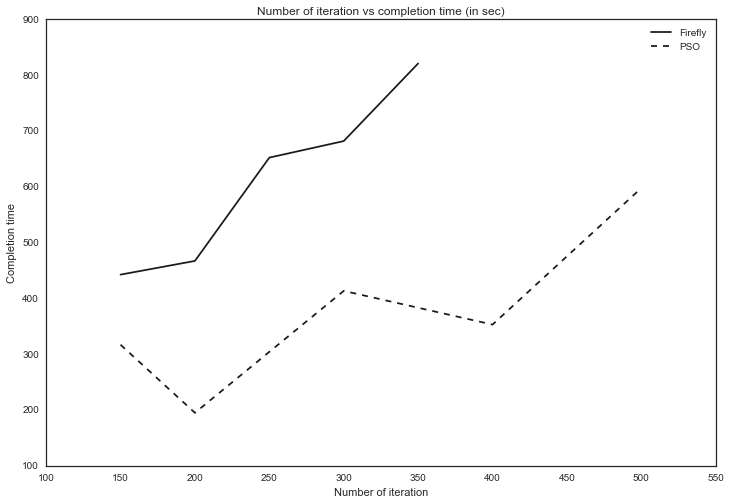

In [181]:
plt.figure(figsize=(12,8))
plt.plot(firefly_data.max_iter, firefly_data.finish_time, '-', label="Firefly",c="0.1")
plt.plot(pso_data.max_iter, pso_data.finish_time, '--', label="PSO",c="0.1")
plt.title("Number of iteration vs completion time (in sec)")
plt.legend()
plt.xlim([100,550])
plt.xlabel("Number of iteration")
plt.ylabel("Completion time")
plt.savefig(filename="iteration_time.jpg",bbox_inches='tight')

In [176]:
# import math
# rmse_pso = math.sqrt(calculate_mse(weights))
pso_data['error'][3]

1.7106308940677915

In [177]:
firefly_weights = [1.68025248e-01,   6.33696638e-01,
          1.66857644e-01,   9.56715600e-01,   1.40681305e-02,
          5.67212948e-01,   1.00000000e+00,   6.86592048e-02,
          5.79232355e-01,   1.61788904e-01,   4.37825980e-01,
          3.69704405e-01,   0.00000000e+00,   4.01681141e-03,
          8.79106525e-01,   1.00000000e+00,   1.05052174e-01,
          1.07819948e-01,   2.72514379e-01,   3.28510792e-01,
          6.13944565e-01,   9.51533687e-02,   4.47570215e-01,
          1.30900553e-01,   2.16290656e-01,   6.44635553e-01,
          5.39704064e-01,   3.07633150e-01,   4.08444731e-01,
          1.21906170e-01,   8.90305749e-01,   7.84412855e-01,
          1.27553341e-02,   3.72605965e-01,   1.00000000e+00,
          9.32838295e-01,   4.78820245e-02,   5.38214725e-01,
          1.17678254e-01,   8.90642164e-01,   9.63329961e-01,
          5.95070050e-01,   1.71280877e-01,   8.36161037e-01,
          8.92182043e-01,   8.49683813e-01,   7.79639685e-01,
          4.30269157e-01,   1.47509001e-01,   6.26900403e-01,
          0.00000000e+00,   1.85521377e-01,   0.00000000e+00,
          8.12236457e-01,   3.09164602e-01,   9.12206287e-01,
          1.30752794e-01,   6.50837607e-01,   7.96365160e-01,
          2.73648179e-01,   7.36400471e-01,   0.00000000e+00,
          8.11443812e-01,   2.90960605e-01,   5.66172405e-01,
          2.83946883e-01,   1.93584952e-02,   0.00000000e+00,
          7.15086381e-01,   1.55208457e-01,   3.60413957e-01,
          1.00000000e+00,   1.36068943e-01,   5.51236193e-01]
pso_weights = [6.991025340806624744e-01,6.864600601424905024e-01,4.577271812056464828e-01,6.149641724232440820e-01,9.233228441591770919e-01,1.472056226177070534e-02,8.430557787731045583e-01,6.751057965208809852e-01,9.911109797898056684e-01,3.862303349207192871e-01,0.000000000000000000e+00,1.036704318254458052e-04,2.173106328552092403e-01,5.726397444991686569e-01,0.000000000000000000e+00,3.643106146455452610e-01,6.817808724091881656e-01,8.239947398097096087e-01,8.677191086806317344e-01,1.544605817412877669e-01,5.341773493326725797e-01,1.983626238302186250e-04,1.000000000000000000e+00,2.262375227399178804e-02,0.000000000000000000e+00,3.032814779006614558e-01,5.493174581777889864e-01,3.710592650635394785e-01,2.078290345498789993e-02,6.119626618786409011e-01,0.000000000000000000e+00,0.000000000000000000e+00,6.299069535185680691e-01,6.357850800082401888e-01,6.654054099204487205e-01,6.216289028085781460e-02,8.997043478538357952e-01,4.735720257070915595e-01,2.573173267430859945e-01,3.043953400517680485e-01,7.185977794447576672e-01,1.637464352945744439e-02,3.458274241513435432e-01,1.109355051208655261e-02,6.170920155398555984e-01,5.763464806065040635e-01,5.835127099390990946e-01,2.480718849071708865e-01,1.815783140317607791e-01,9.475015416394066969e-01,7.692050348184397695e-06,6.593428423157277063e-01,3.866610975531077909e-01,8.269520957416945928e-01,4.555524577485187132e-01,4.555217118352588024e-01,6.654185311852937046e-01,6.778156336804584958e-01,4.849310694210372842e-06,6.341067771092458692e-03,6.907898250408722740e-02,1.968814704515519376e-01,1.888917821851804901e-01,1.000000000000000000e+00,4.880525609153650857e-01,7.984339061873557686e-02,0.000000000000000000e+00,1.586031845535752771e-01,0.000000000000000000e+00,9.192661670781081540e-01,7.055951888894982336e-03,4.910685979937167156e-01,2.679131244364733599e-01,1.161900433009498551e-01]

In [178]:
import math
rmse_pso = math.sqrt(calculate_mse(pso_weights))
rmse_firefly = math.sqrt(calculate_mse(firefly_weights))

In [179]:
# ax = plt.axes()
# plt.bar([1,2], [rmse_pso,rmse_firefly], width=0.2, label=['pso','firefly'],align='center')
# plt.xlim([0,3])
# plt.ylim([0,3])
# # plt.tick_params(
# #     axis='x',          # changes apply to the x-axis
# #     which='both',      # both major and minor ticks are affected
# #     bottom='off',      # ticks along the bottom edge are off
# #     top='off',         # ticks along the top edge are off
# #     labelbottom='off')
# ax.set_xticks(x)
# ax.set_xticklabels(['PSO', 'Firefly'])
# plt.legend()

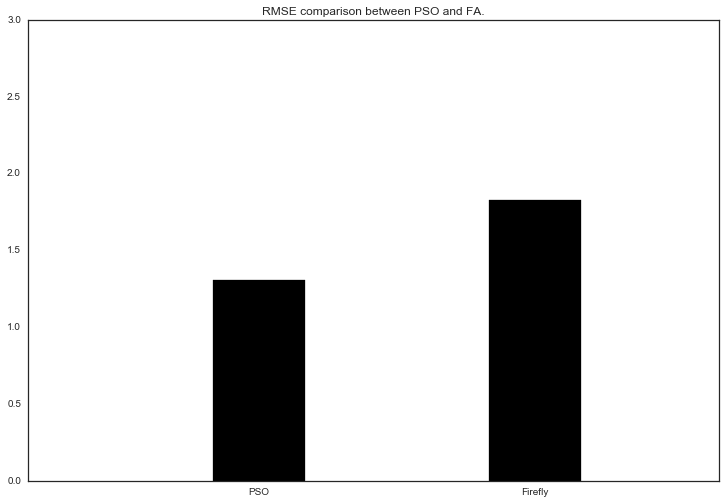

In [186]:
import pylab
x = [1,1.6]
y = [rmse_pso,rmse_firefly]
f = pylab.figure(figsize=(12,8))
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(x, y, align='center',width=0.2, color="black")
ax.set_xticks(x)
ax.set_xticklabels(['PSO','Firefly'])
ax.set_xlim([0.5,2])
ax.set_ylim([0,3])
ax.set_title("RMSE comparison between PSO and FA.")
f.savefig(filename="Rmse_comparison.jpg",bbox_inches='tight')